In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Завантаження вибірки
digits = load_digits()

# Масштабування ознак
data_scaled = scale(digits.data)

# Розмірність даних, кількість ознак і об'єктів
print("Розмірність даних:", data_scaled.shape)
print("Кількість ознак:", data_scaled.shape[1])
print("Кількість об'єктів:", data_scaled.shape[0])

# Кількість унікальних значень у цільовій змінній
unique_targets = len(set(digits.target))
print("Кількість унікальних значень у цільовій змінній:", unique_targets)


Розмірність даних: (1797, 64)
Кількість ознак: 64
Кількість об'єктів: 1797
Кількість унікальних значень у цільовій змінній: 10


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import time

OMP_NUM_THREADS=8
# Застосування KMeans
kmeans = KMeans(init='k-means++', n_clusters=unique_targets, n_init=10)
start_time = time.time()
kmeans.fit(data_scaled)
end_time = time.time()

# Порахунок метрик
ari = adjusted_rand_score(digits.target, kmeans.labels_)
ami = adjusted_mutual_info_score(digits.target, kmeans.labels_)
print("ARI:", ari)
print("AMI:", ami)
print("Час роботи алгоритму:", end_time - start_time, "секунд")

# Відобразити результати на 2D площині (застосовуючи PCA) і відобразити центри кожного кластера та межі кожного кластера


C:\Users\Roma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


ARI: 0.5695990387329408
AMI: 0.6955616361873462
Час роботи алгоритму: 0.26832008361816406 секунд


In [8]:
# Застосування KMeans з параметром init='random'
kmeans_random = KMeans(init='random', n_clusters=unique_targets, n_init=10)
start_time = time.time()
kmeans_random.fit(data_scaled)
end_time = time.time()

# Порахунок метрик
ari_random = adjusted_rand_score(digits.target, kmeans_random.labels_)
ami_random = adjusted_mutual_info_score(digits.target, kmeans_random.labels_)
print("ARI (init='random'):", ari_random)
print("AMI (init='random'):", ami_random)
print("Час роботи алгоритму (init='random'):", end_time - start_time, "секунд")

# Відобразити результати на 2D площині (застосовуючи PCA) і відобразити центри кожного кластера та межі кожного кластера


C:\Users\Roma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


ARI (init='random'): 0.4770155367990045
AMI (init='random'): 0.628976436306799
Час роботи алгоритму (init='random'): 0.3201425075531006 секунд


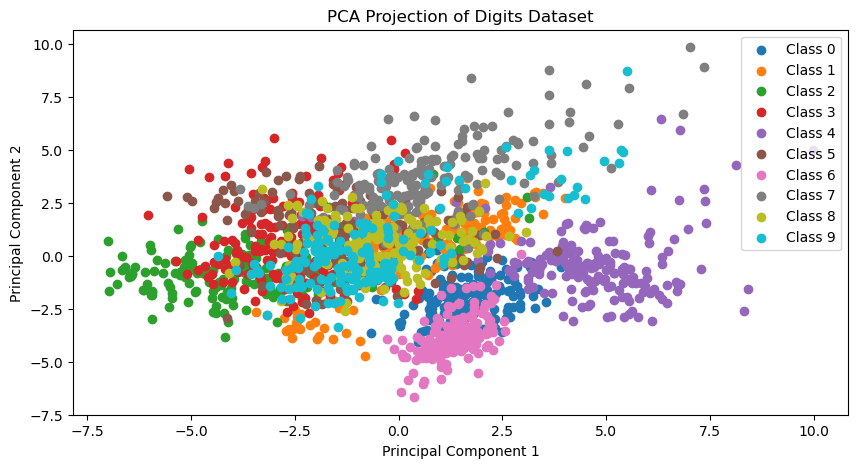

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(unique_targets):
    plt.scatter(data_pca[digits.target == i, 0], data_pca[digits.target == i, 1], label=f"Class {i}")

plt.title('PCA Projection of Digits Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [6]:
# Застосування KMeans з параметром init=pca.components_
kmeans_pca = KMeans(init=pca.components_, n_clusters=unique_targets, n_init=10)
start_time = time.time()
kmeans_pca.fit(data_scaled)
end_time = time.time()

# Порахунок метрик
ari_pca = adjusted_rand_score(digits.target, kmeans_pca.labels_)
ami_pca = adjusted_mutual_info_score(digits.target, kmeans_pca.labels_)
print("ARI (init=pca.components_):", ari_pca)
print("AMI (init=pca.components_):", ami_pca)
print("Час роботи алгоритму (init=pca.components_):", end_time - start_time, "секунд")


ARI (init=pca.components_): 0.5542653654111069
AMI (init=pca.components_): 0.6771577864975292
Час роботи алгоритму (init=pca.components_): 0.05221962928771973 секунд


C:\Users\Roma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Roma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
